In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [1]:
# credits.head(1)['cast'].values

In [6]:
pd.merge(movies , credits , on = 'title').shape

(4809, 23)

In [7]:
movies.shape

(4803, 20)

In [8]:
credits.shape

(4803, 4)

In [9]:
movies = pd.merge(movies , credits , on = 'title')

In [10]:
movies.shape

(4809, 23)

In [11]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [12]:
del credits

In [13]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [14]:
## [ 'genres' , 'id', 'keywords', 'original_language' , 'title' , 'overview' , 'spoken_languages' , 'spoken_languages', 'cast' ,'crew' ]

**release_date**

Try to figure out how can you incorporate 'release_date' in this system

In [15]:
movies.original_language

0       en
1       en
2       en
3       en
4       en
        ..
4804    es
4805    en
4806    en
4807    en
4808    en
Name: original_language, Length: 4809, dtype: object

<Axes: xlabel='original_language', ylabel='count'>

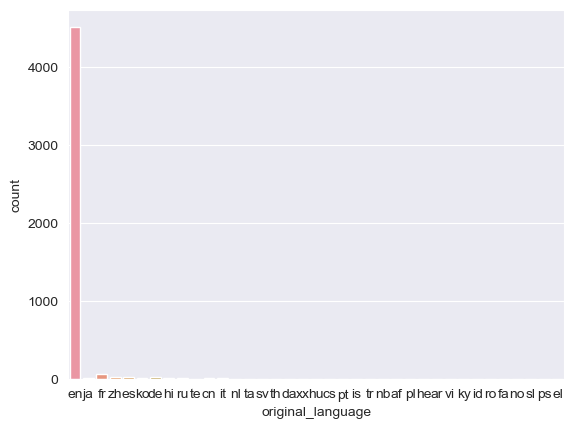

In [16]:
sns.countplot(x='original_language' , data = movies)

In [17]:
movies.original_language.value_counts()

en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: original_language, dtype: int64

In [18]:
## [ 'genres' , 'id', 'keywords', 'original_language' , 'title' , 'overview' , 'spoken_languages' , 'spoken_languages', 'cast' ,'crew' ]

movies = movies[ [ 'id' , 'title',  'overview' , 'genres' , 'keywords',  'cast' ,'crew' ,'original_language' , 'spoken_languages' ]]

In [19]:
movies.columns

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'original_language', 'spoken_languages'],
      dtype='object')

In [20]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [21]:
movies.isnull().sum()

id                   0
title                0
overview             3
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
spoken_languages     0
dtype: int64

In [22]:
movies[movies.overview.isnull()]

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
2662,370980,Chiamatemi Francesco - Il Papa della gente,NaN,"[{""id"": 18, ""name"": ""Drama""}]","[{""id"": 717, ""name"": ""pope""}, {""id"": 5565, ""na...","[{""cast_id"": 5, ""character"": ""Jorge Mario Berg...","[{""credit_id"": ""5660019ac3a36875f100252b"", ""de...",it,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]"
4147,459488,"To Be Frank, Sinatra at 100",NaN,"[{""id"": 99, ""name"": ""Documentary""}]","[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...","[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de...",en,[]
4437,292539,Food Chains,NaN,"[{""id"": 99, ""name"": ""Documentary""}]",[],[],"[{""credit_id"": ""5470c3b1c3a368085e000abd"", ""de...",de,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [23]:
movies.dropna(inplace=True)

In [24]:
movies.isnull().sum()

id                   0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
original_language    0
spoken_languages     0
dtype: int64

## Preprocessing

## Converting column values into tags

**genres**

In [25]:
x = movies.iloc[0].genres
x

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [27]:
type(x)

str

In [28]:
import ast
def convert(obj) : 
    l = []
    for i in ast.literal_eval(obj) :
        l.append(i["name"])
    return l

In [29]:
convert(x)

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [30]:
movies.genres = movies.genres.apply(convert)

In [31]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


**keywords**

In [33]:
movies['keywords'] = movies['keywords'].apply(convert)

In [34]:
movies.head(1)

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."


**cast**

now we just want the top three cast of the film

In [35]:
x = movies['cast'][0]

In [36]:
ast.literal_eval(x)[0]['name']

'Sam Worthington'

In [37]:
def convert3(obj):
    
    l = []
    counter = 0
    for i in ast.literal_eval(obj):
        if counter != 3 :
            l.append(i["name"])
            counter+=1
        else :
            break
    return l


In [38]:
movies['cast'] = movies['cast'].apply(convert3)

In [39]:
movies.head(1)

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."


**crew**

In [2]:
# movies['crew'][0]

In [41]:
x= movies['crew'][0]

In [42]:
def fetch_director(x) :
    l = []
    for i in ast.literal_eval(x):
        if i['job'] =='Director':
            l.append(i['name'])
            break
# ----------------------------
        else :
            continue
# ----------------------------
    return l


In [43]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [44]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


**overview**

In [45]:
movies['overview'] = movies['overview'].apply(lambda x : x.split())

**spoken_languages**

In [46]:
movies['spoken_languages'][0]

'[{"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}]'

In [47]:
movies['spoken_languages'] = movies['spoken_languages'].apply(convert)

In [48]:
movies.head()

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron],en,"[English, Español]"
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],en,[English]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes],en,"[Français, English, Español, Italiano, Deutsch]"
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan],en,[English]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],en,[English]


### **We need to remove spaces within keywords**

for eg :

'Sam Worthington' becomes 'SamWorthington'

because Sam and worthington will be counted as two different words/keywords

There is another person(director [index : 2]) named 'Sam Mendes', maybe we going for sam worthington movies but then get Sam Mendes movie due to this "space"

In [50]:
def remove_space(obj):
    l = []
    for i in obj :
        try:
            l.append(''.join(i.split()))
        except :
            l.append(i)
    return l

In [51]:
movies['genres'] = movies['genres'].apply(lambda x : [i.replace(" ","") for i in x ])
movies['keywords'] = movies['keywords'].apply(lambda x : [i.replace(" ","") for i in x ])
movies['cast'] = movies['cast'].apply(lambda x : [i.replace(" ","") for i in x ])
movies['crew'] = movies['crew'].apply(lambda x : [i.replace(" ","") for i in x ])

In [52]:
movies.head(1)

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],en,"[English, Español]"


**original_language**

need the value of this column and array so we can concatenate it with other columns

In [54]:
movies['original_language'] = movies['original_language'].apply(lambda x : [x])

## Concatenating all columns in one "tags" column

In [56]:
movies.head(1)

,id,title,overview,genres,keywords,cast,crew,original_language,spoken_languages
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],[en],"[English, Español]"


In [57]:
movies['tags'] = movies['overview']+ movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew'] + movies['original_language'] + movies['spoken_languages']

## Creating a new DF, as we don't need all the columns

In [58]:
movies.head(1).columns

Index(['id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'original_language', 'spoken_languages', 'tags'],
      dtype='object')

In [59]:
new_df = movies[['id' , 'title' , 'tags']]

In [60]:
new_df.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [61]:
# Converting the list in 'tags' into a string

new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))

C:\Users\siddh\AppData\Local\Temp\ipykernel_16580\712148552.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : " ".join(x))


In [62]:
new_df['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron en English Español'

In [63]:
new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())

C:\Users\siddh\AppData\Local\Temp\ipykernel_16580\3679624391.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x : x.lower())


In [64]:
import nltk

In [65]:
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [66]:
def stem(text) :
    y= []
    for i in text.split():
        y.append(ps.stem(i))
    return ' '.join(y)

In [67]:
new_df['tags'] = new_df['tags'].apply(stem)

C:\Users\siddh\AppData\Local\Temp\ipykernel_16580\3213734980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)


## ---------

In [68]:
new_df['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav jamescameron en english español'

In [69]:
new_df['tags'][1]

"captain barbossa, long believ to be dead, ha come back to life and is head to the edg of the earth with will turner and elizabeth swann. but noth is quit as it seems. adventur fantasi action ocean drugabus exoticisland eastindiatradingcompani loveofone'slif traitor shipwreck strongwoman ship allianc calypso afterlif fighter pirat swashbuckl aftercreditssting johnnydepp orlandobloom keiraknightley goreverbinski en english"

In [70]:
from sklearn.feature_extraction.text import CountVectorizer

In [71]:
cv = CountVectorizer(max_features=5000 , stop_words='english')

In [72]:
vectors = cv.fit_transform(new_df['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
vectors.shape

(4806, 5000)

In [75]:

len(cv.get_feature_names_out())

5000

In [78]:
from sklearn.metrics.pairwise import cosine_similarity

In [79]:
cosine_similarity(vectors)

array([[1.        , 0.13176157, 0.15389675, ..., 0.0860663 , 0.04428074,
        0.04714045],
       [0.13176157, 1.        , 0.10814761, ..., 0.06804138, 0.046676  ,
        0.0745356 ],
       [0.15389675, 0.10814761, 1.        , ..., 0.06622662, 0.04543109,
        0.04836508],
       ...,
       [0.0860663 , 0.06804138, 0.06622662, ..., 1.        , 0.07622159,
        0.08114408],
       [0.04428074, 0.046676  , 0.04543109, ..., 0.07622159, 1.        ,
        0.12524486],
       [0.04714045, 0.0745356 , 0.04836508, ..., 0.08114408, 0.12524486,
        1.        ]])

In [80]:
cosine_similarity(vectors).shape

(4806, 4806)

In [81]:
similarity = cosine_similarity(vectors)

In [82]:
similarity.shape

(4806, 4806)

**We can see that the first movie's  score with the first movie is 1, i.e it is completely similar (well, same in this case)**

In [85]:
similarity[0]

array([1.        , 0.13176157, 0.15389675, ..., 0.0860663 , 0.04428074,
       0.04714045])

**Same with the second movie**

In [86]:
similarity[1]

array([0.13176157, 1.        , 0.10814761, ..., 0.06804138, 0.046676  ,
       0.0745356 ])

In [ ]:
def recommend(movie):
    movie_index = new_df[new_df['title'].str.lower() == movie.lower()].index[0]
    distances = similarity[movie_index]
    return

In [92]:
# sorting an array , descending here

# sorted(similarity[0] , reverse = True)

In [89]:
new_df[new_df['title'] == 'Batman Begins'].index

119

In [95]:
sorted(similarity[0] , reverse = True)[1:6]

[0.3124662143898683,
 0.3105295017040594,
 0.303064062678102,
 0.2988071523335984,
 0.29668305198196504]

In [118]:
new_df.columns

Index(['id', 'title', 'tags'], dtype='object')

In [119]:
def recommend(movie):
    movie_index = new_df[new_df['title'].str.lower() == movie.lower()].index[0]
    distances = similarity[movie_index]
    
    movies_list = sorted(list(enumerate(distances)), reverse = True , key = lambda x : x[1] )  [1:6]    
    
    for i in movies_list :
        print(  new_df.iloc[i[0] , 1 ])


In [120]:
recommend('avatar')

Aliens vs Predator: Requiem
Falcon Rising
Aliens
Small Soldiers
Predators


In [121]:
recommend('batman begins')

The Dark Knight
Batman
Batman
10th & Wolf
The Dark Knight Rises


In [122]:
import pickle

In [124]:
pickle.dump(new_df.to_dict(), open('movies_dict.pkl' ,'wb') )

In [125]:
pickle.dump(similarity , open('similarity.pkl' ,'wb'))